# Librerías —ฅ/ᐠ. ̫ .ᐟ\\ฅ —\n
---

In [1]:
%matplotlib widget
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy.integrate import odeint
from scipy.sparse.linalg import eigsh

# Punto A) Demostración del Algoritmo de Numerov
---
Dada la ecuación diferencial de la forma $\frac{d^2 y}{d x^2} = -g(x)y(x) + s(x)(1)$ siendo $g(x)$ y $s(x)$ funciones continuas en un intervalo cerrado. Ahora, podemos desarrollar por Series de Taylor
$$
\begin{align}
y_{n + 1}(x_n + h) = y_n + hy'n + \frac{h^2}{2!}y_n'' + \ldots\ (1)\\
y_{n + 1}(x_n + h) = y_n - hy'n + \frac{h^2}{2!}y_n'' - \ldots\ (2)\\
\end{align}
$$

Ahora bien, si hacemos:
$$
\begin{align*}
(1) + (2) \implies 2y_n + h^2 y_n'' + \frac{h^4}{4!}y^{(4)}+ \ldots\ (3)\\
y''_n = g_ny_n + s_n\\
y^{(4)} = \frac{d^2 y}{dx^2}g_ny_n + s_n\\
= \left[(-g_{n+1})(y_{n+1}) + S_{n+1}+(-g_{n+1})(y_{n-1}) + S_{n+1}- 2(-g_ny_n+s_n)\right] + O(h^4)
\end{align*}
$$
Con esto, sustituimos en las ecuaciones lo que nos queda
$$
y_{n+1} + y_{n - 1} - 2y_n = h^2 [-g_ny_n + s_n] + \frac{h^4}{12}\left[(-g_{n+1})(y_{n+1}) + S_{n+1}+(-g_{n+1})(y_{n-1}) + S_{n+1}- 2(-g_ny_n+s_n)\right]
$$
$$
y_{n+1}\left(1 + \frac{h^4}{12}g_{n+1}\right) - 2y_n\left(1 - \frac{5h^2}{12}g_n\right) + y_{n - 1}\left(1 + \frac{h^2}{12}g_{n-1}\right) = \frac{h^2}{12}\left(S_{n+1} + 10S_n + S_{n-1}\right)
$$

In [2]:
def parte_B(x, E):
    h = 1
    m = 1
    w = 1
    V = 0.5 * m * w**2 * x**2
    Rn = 2 * (E - V)
    Sn = np.zeros_like(x)
    return Rn, Sn

In [3]:
# c
N = 1000
x = np.linspace(-5, 5, N)
h = x[1] - x[0]

In [4]:
# d
def potencial(x):
    return 0.5 * x**2

In [5]:
def metodo_numerov(x, E):
    psi = np.zeros_like(x)
    psi[0] = 0.01
    psi[1] = 0.01

    Rn, _ = parte_B(x, E)

    for i in range(2, N):
        psi[i] = (2 * (1 - (5 * (h**2) / 12) * Rn[i]) * psi[i-1] -
                  (1 + (h**2) / 12 * Rn[i-1]) * psi[i-2])
        

        max_psi = np.max(np.abs(psi))
        if max_psi > 1:
            psi /= max_psi


    psi /= np.max(np.abs(psi))

    return psi

In [6]:
def encontrar_valores_propios(n):
    valores_propios = []
    dE = 0.001
    for E in np.arange(0.5, n, dE):
        psi = metodo_numerov(x, E)
        if psi[-1] * metodo_numerov(x, E + dE)[-1] < 0:
            valores_propios.append(E)
    return valores_propios[:6]

In [7]:
valores_propios = encontrar_valores_propios(6)
print(valores_propios)

[0.522, 1.566000000000001, 2.611000000000002, 3.655000000000003, 4.700000000000004, 5.744000000000005]


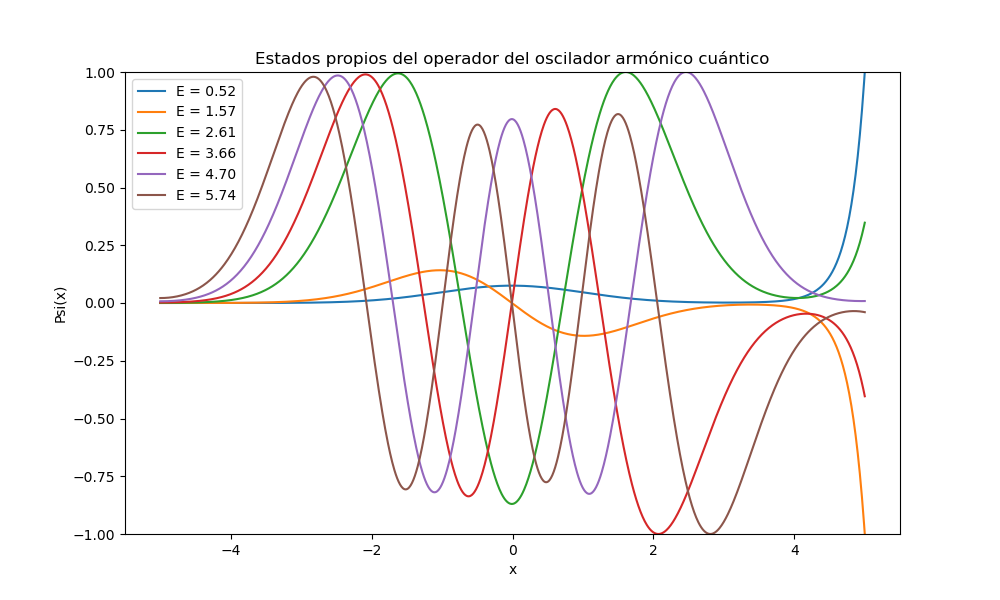

In [8]:
plt.figure(figsize=(10, 6))
for i, E in enumerate(valores_propios):
    psi = metodo_numerov(x, E)
    plt.plot(x, psi, label=f"E = {E:.2f}")
plt.title("Estados propios del operador del oscilador armónico cuántico")
plt.xlabel("x")
plt.ylabel("Psi(x)")
plt.legend()
plt.ylim(-1, 1)  
plt.yticks(np.arange(-1, 1.25, 0.25))  
plt.show()

In [9]:
def potencial_gaussiano(x):
    return -10 * np.exp(-x**2 / 20)

In [10]:
def encontrar_valores_propios_gaussiano():
    En_gaussiano = [-9.51, -8.54, -7.62, -6.74, -5.89]
    valores_propios_gaussiano = []
    for E in En_gaussiano:
        psi = metodo_numerov(x, E)
        valores_propios_gaussiano.append((E, psi))
    return valores_propios_gaussiano

valores_propios_gaussiano = encontrar_valores_propios_gaussiano()

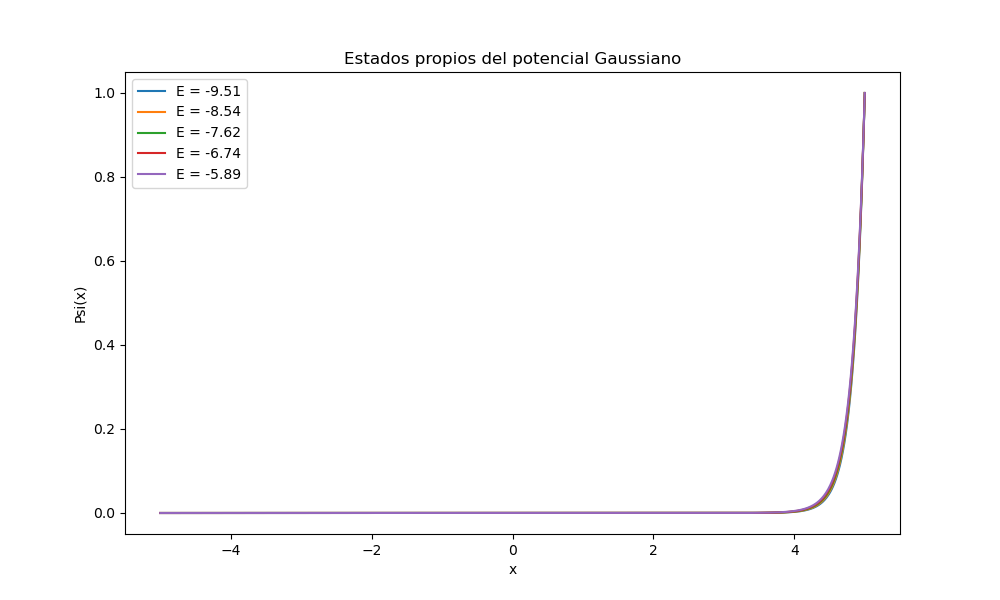

In [11]:
plt.figure(figsize=(10, 6))
for E, psi in valores_propios_gaussiano:
    plt.plot(x, psi, label=f"E = {E:.2f}")
plt.title("Estados propios del potencial Gaussiano")
plt.xlabel("x")
plt.ylabel("Psi(x)")
plt.legend()
plt.show()

In [12]:
def potencial_racional(x):
    return -4 / (1 + x**2)**2

In [13]:
def encontrar_valores_propios_racional():
    En_racional = [-1.478, -0.163]
    valores_propios_racional = []
    for E in En_racional:
        psi = metodo_numerov(x, E)
        valores_propios_racional.append((E, psi))
    return valores_propios_racional

valores_propios_racional = encontrar_valores_propios_racional()


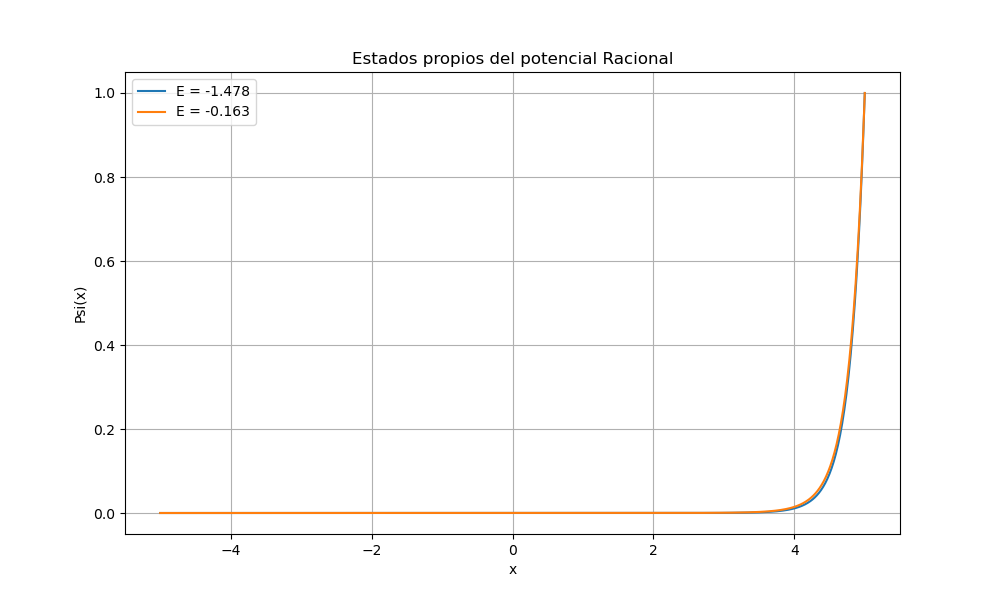

In [14]:
plt.figure(figsize=(10, 6))
for E, psi in valores_propios_racional:
    plt.plot(x, psi, label=f"E = {E:.3f}")
plt.title("Estados propios del potencial Racional")
plt.xlabel("x")
plt.ylabel("Psi(x)")
plt.legend()
plt.grid(True)
plt.show()